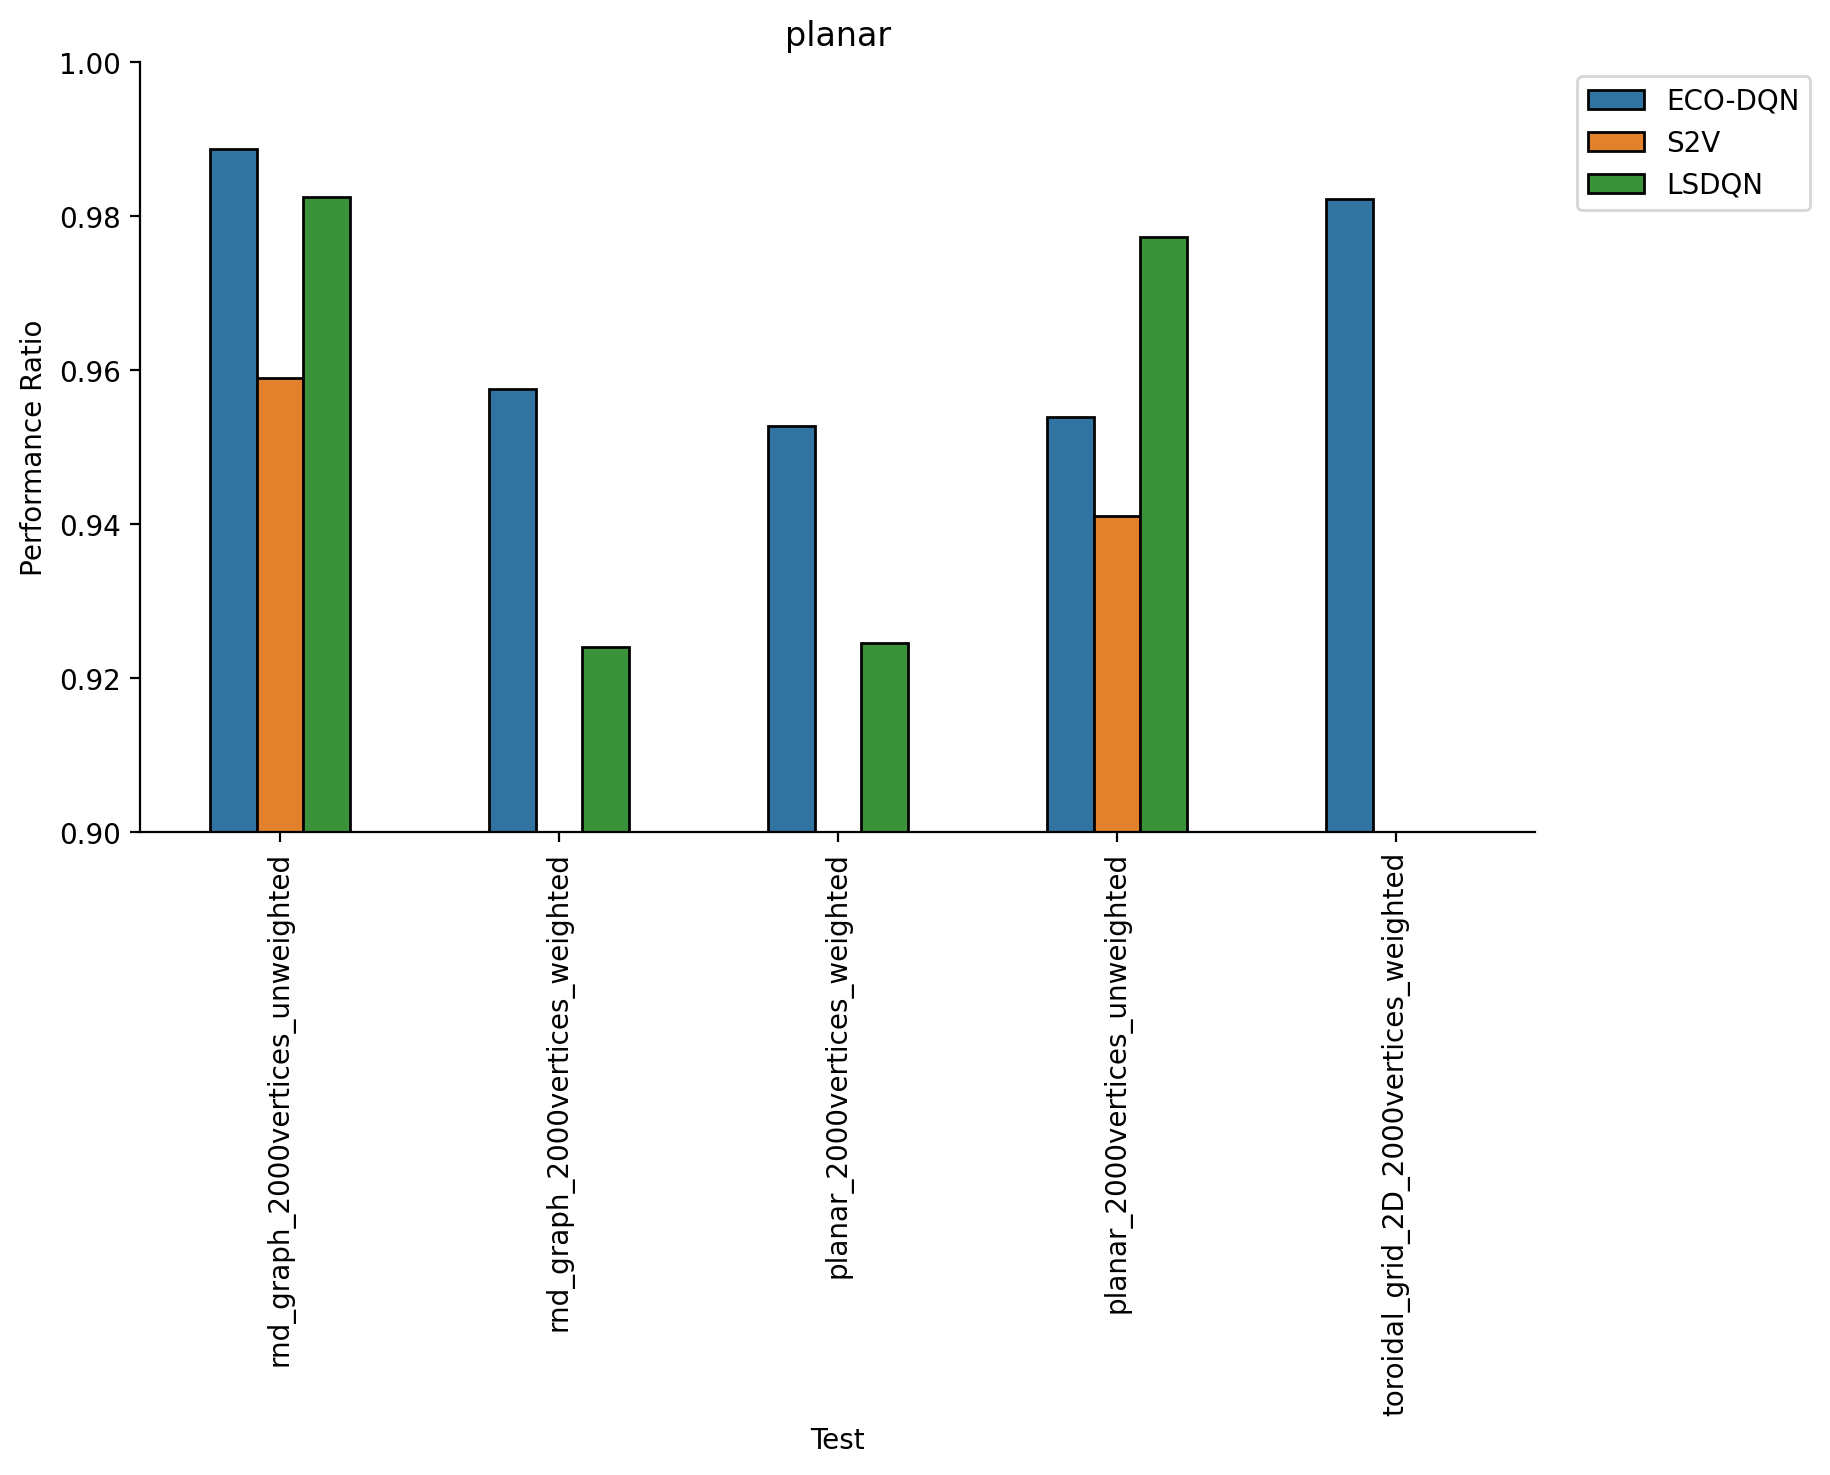

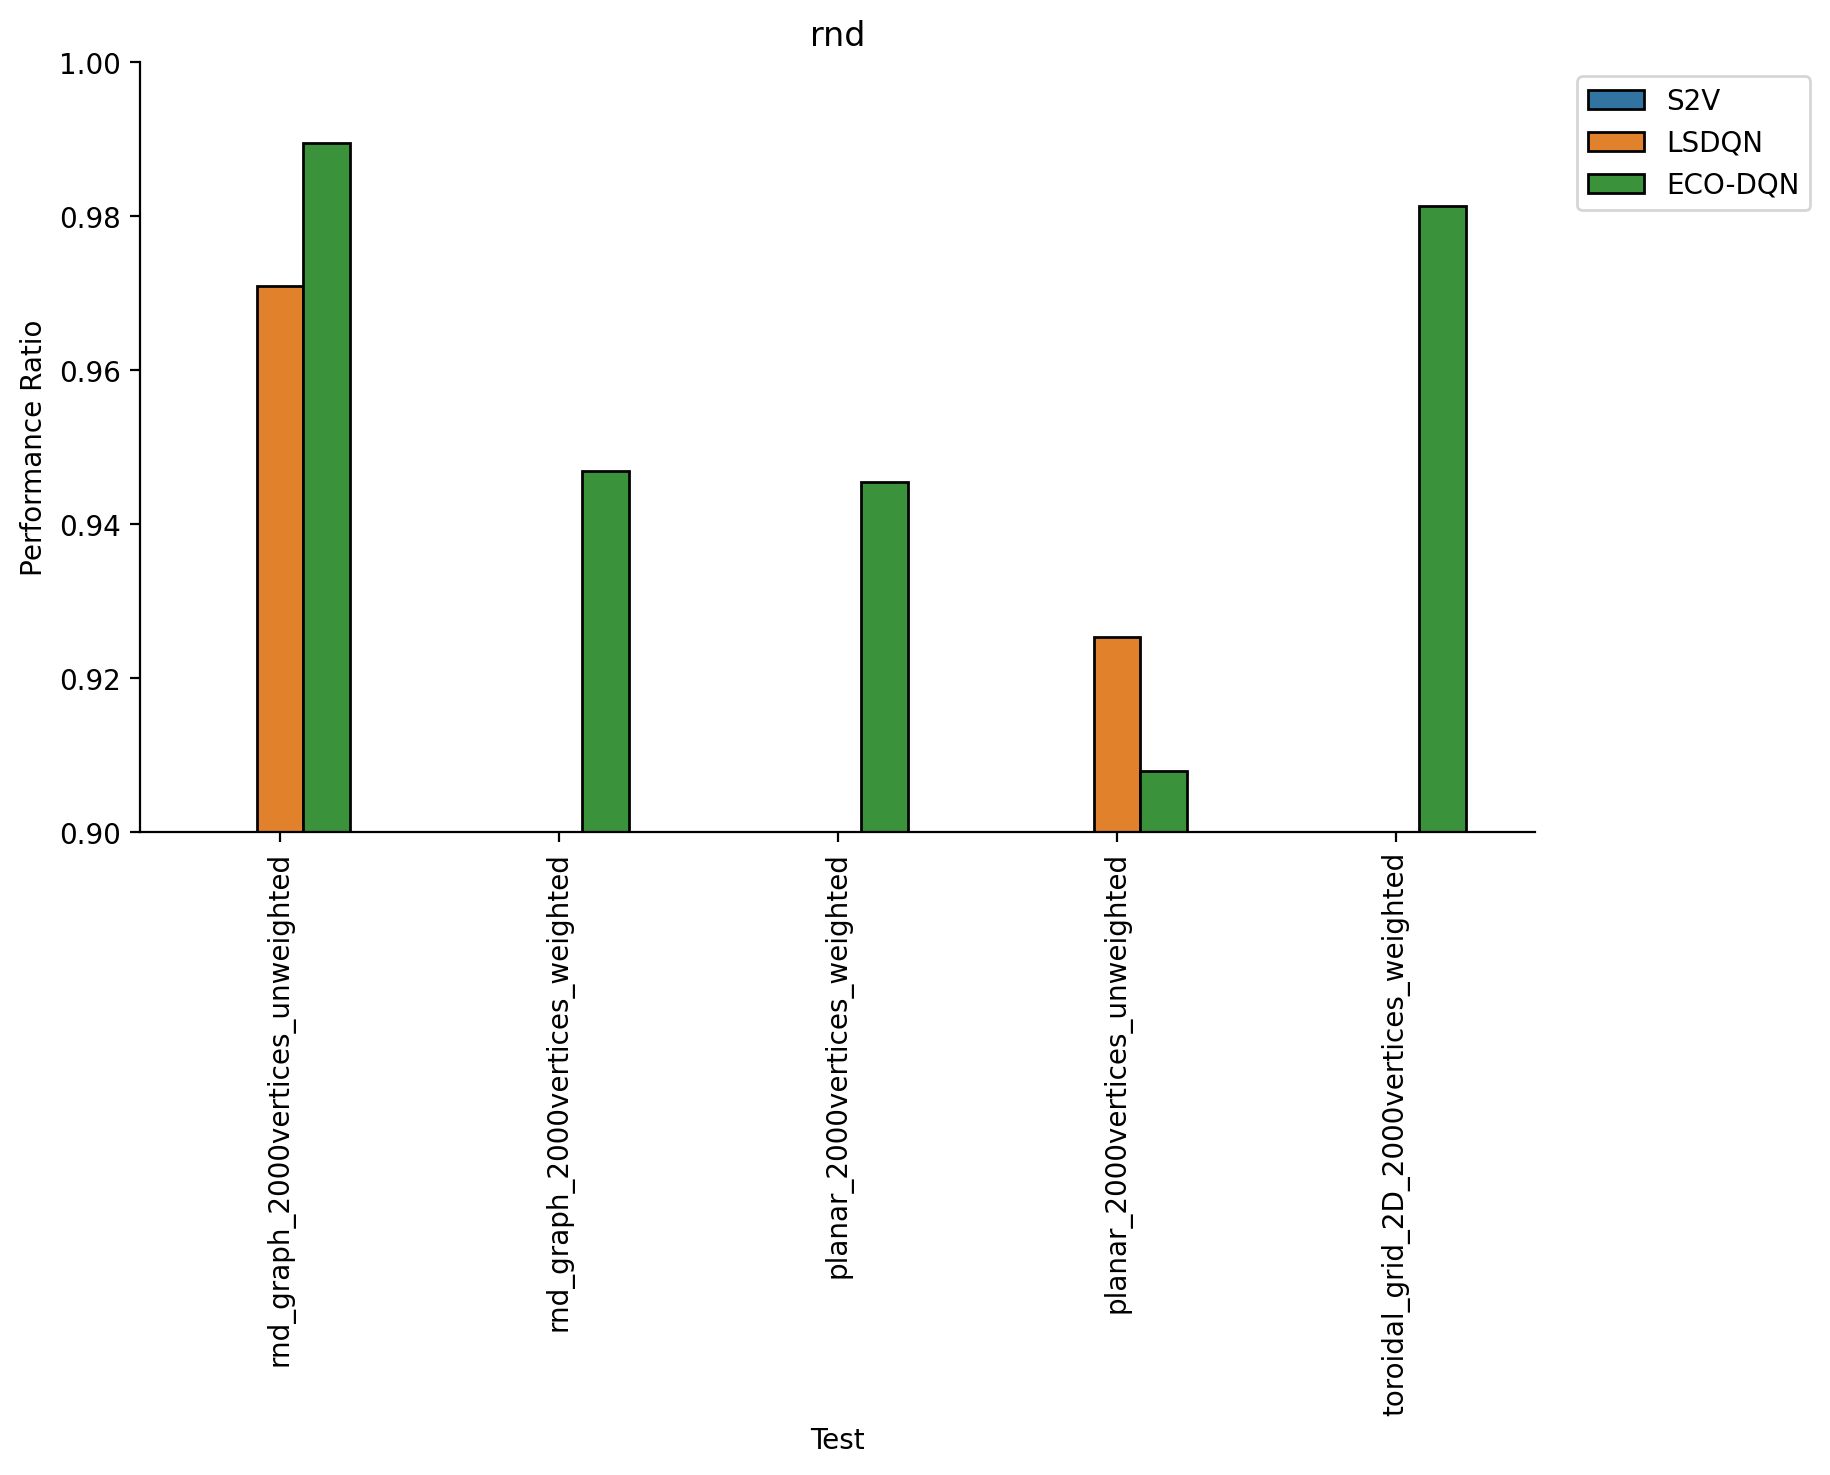

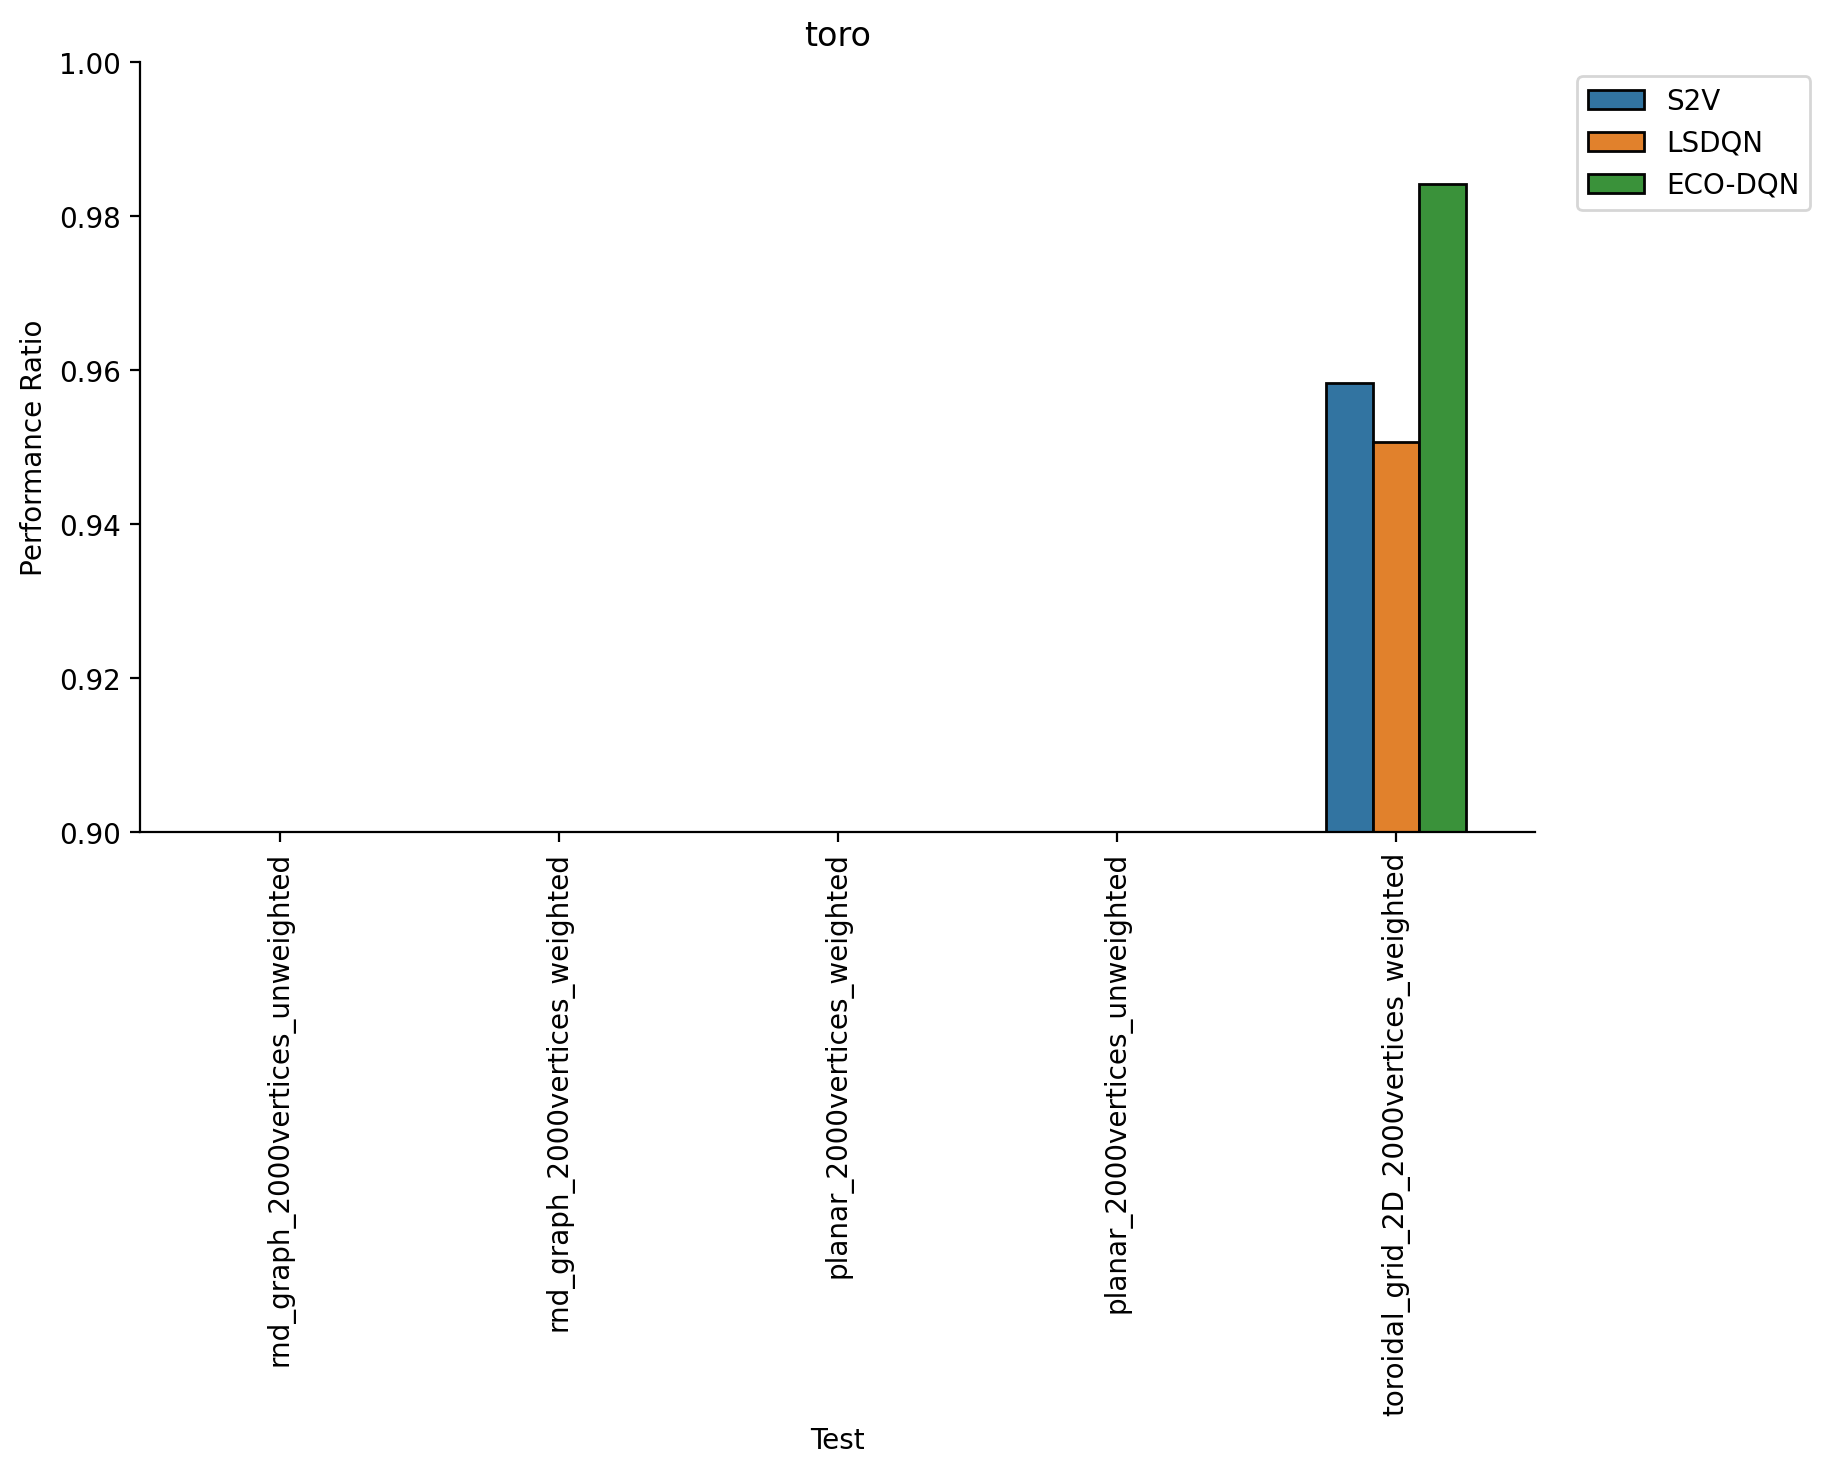

In [58]:
import pickle
import os
import pandas as pd
from collections import defaultdict

def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

# print(os.listdir('generalization'))
root_folder='generalization'

folders=os.listdir(root_folder)


df={'Train':[],'Test':[],'Model':[],'Performance Ratio':[]}


for folder in folders:

    if folder.startswith('rnd'):
        train_dist='rnd'
    elif folder.startswith('planar'):
        train_dist='planar'
    else:
        train_dist='toro'

    
    if folder.endswith('S2V'):
        model='S2V'
    elif folder.endswith('LSDQN'):
        model='LSDQN'
    else:
        model='ECO-DQN'
    # model=folder.split('_',maxsplit=4)[-1]
    # print('Model:',model)
    folder_path=os.path.join(root_folder,folder)
    files=os.listdir(folder_path)
    for file in files:
        test_distribution=file.split('_',maxsplit=1)[1]
        data=load_pickle(file_path=os.path.join(folder_path,file))
        OPT = load_pickle(f'../data/testing/{test_distribution}/optimal')['OPT']
        ratio=(data['cut']/OPT).mean()
        df['Train'].append(train_dist)
        # df['Test'].append(test_distribution.split('_')[0])
        df['Test'].append(test_distribution)
        df['Model'].append(model)
        df['Performance Ratio'].append(ratio)
        # df['OPT'] += OPT.to_list()

    
    # print()
    # print(folder)
    # break

import seaborn as sns
import matplotlib.pyplot as plt

df=pd.DataFrame(df)


for train_dist,train_group_df in df.groupby('Train'):
    # for test_dist,test_group_df in train_group_df.groupby('Test'):

    plt.figure(dpi=200,figsize=(9, 5))
#     plt.figure(dpi=200)
    ax = sns.barplot(data=train_group_df, x="Test", y="Performance Ratio", hue="Model", width=0.5, 
                     errwidth='1', linewidth=1, edgecolor=".01",
                     )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    sns.despine(ax=ax, top=True, right=True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
    plt.ylim(0.9, 1)
    plt.title(train_dist)
        # print('')
        # sns.barplot(x='Model', y='Performance Ratio', data=test_group_df)
        # break
    

In [59]:
train_group_df

,Train,Test,Model,Performance Ratio
10,toro,rnd_graph_2000vertices_unweighted,S2V,0.722162
11,toro,rnd_graph_2000vertices_weighted,S2V,0.239501
12,toro,planar_2000vertices_weighted,S2V,0.013441
13,toro,planar_2000vertices_unweighted,S2V,0.694256
14,toro,toroidal_grid_2D_2000vertices_weighted,S2V,0.958364
20,toro,rnd_graph_2000vertices_unweighted,LSDQN,0.764047
21,toro,rnd_graph_2000vertices_weighted,LSDQN,0.059618
22,toro,planar_2000vertices_weighted,LSDQN,0.052147
23,toro,planar_2000vertices_unweighted,LSDQN,0.781248
24,toro,toroidal_grid_2D_2000vertices_weighted,LSDQN,0.950662
